# Introduction to Financial Forecasting with Python

Welcome to our session on financial forecasting using Python! In this module, we'll dive into the fascinating world of time series analysis and prediction. We'll start by exploring a basic forecasting model using synthetic data to understand the fundamentals of time series forecasting. This will set the foundation for more complex analyses that you'll encounter in real-world financial data.

## The Original Code: A Starting Point
We begin with a Python script that generates synthetic financial data. This data simulates a simple financial time series with a linear trend and some random noise, mimicking a basic scenario in financial forecasting. We'll use this data to:

- Understand the structure of time series data.
- Learn how to split data appropriately for time series forecasting.
- Explore the application of linear regression in a time series context.
- Visualize and evaluate the performance of our forecasting model.

## Upcoming Assignment
After familiarizing yourselves with the original code, you will be tasked with an assignment that builds on these concepts. You'll apply your skills to real financial data, where you will:

- Engage in more complex feature engineering.
- Experiment with different forecasting models.
- Analyze and compare the performance of your models.

The details of the assignment will be provided later in this Jupyter Notebook. This will be your opportunity to apply the concepts learned in a more realistic and challenging setting.

So, let's get started with the original code and begin our journey into the world of financial forecasting!


In [2]:
#!pip install pmdarima

# Paul's Code:

Mean Absolute Error (MAE): 2.73
Mean Squared Error (MSE): 11.42
Root Mean Squared Error (RMSE): 3.38


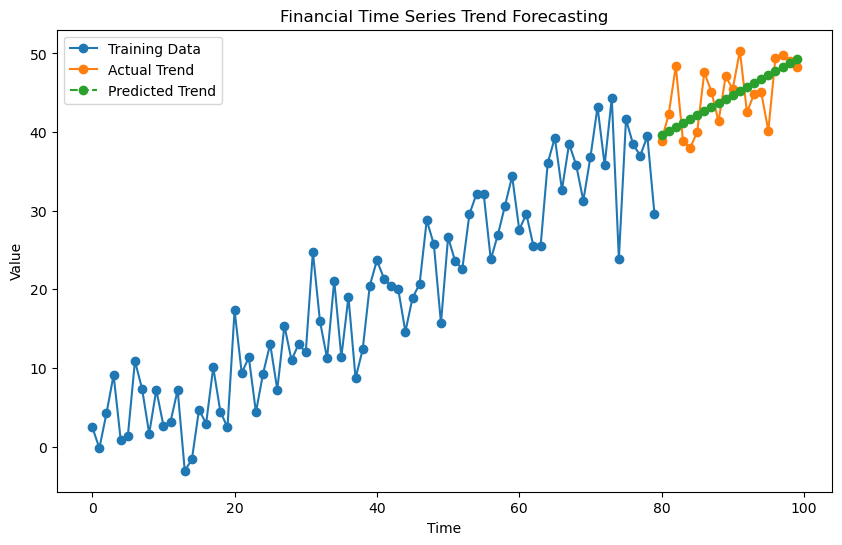

Mean Absolute Error (MAE): 3.64
Mean Squared Error (MSE): 21.54
Root Mean Squared Error (RMSE): 4.64


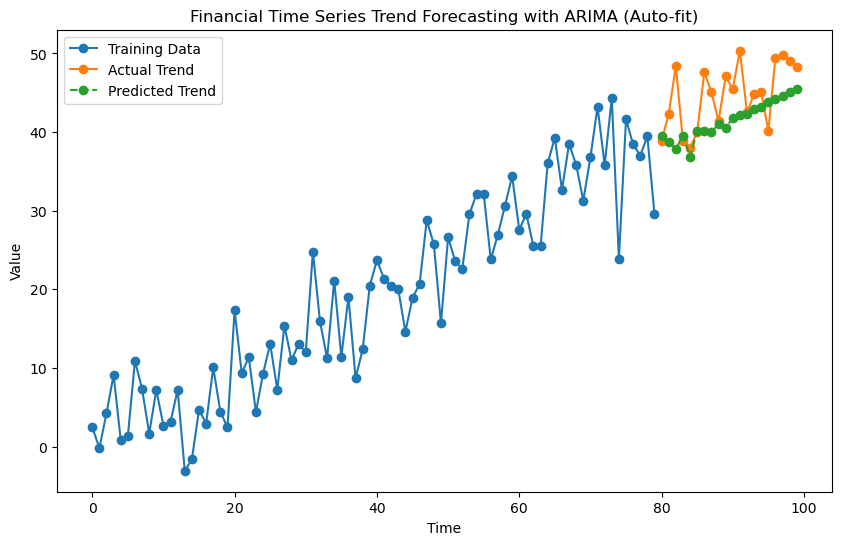

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate synthetic financial data with a trend
np.random.seed(42)
n_points = 100
time = np.arange(n_points)
trend = 0.5 * time + np.random.normal(scale=5, size=n_points)
financial_data = pd.DataFrame({'Time': time, 'Trend': trend})

# Split the data into training and testing sets
train_size = int(0.8 * n_points)
train_data = financial_data.head(train_size).copy()
test_data = financial_data.tail(n_points - train_size).copy()

# Fit a linear regression model
model = LinearRegression()
model.fit(train_data[['Time']], train_data['Trend'])

# Predict the trend for the test set
test_data['Trend_Predicted'] = model.predict(test_data[['Time']])

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], test_data['Trend_Predicted'])
mse = mean_squared_error(test_data['Trend'], test_data['Trend_Predicted'])
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], test_data['Trend_Predicted'], label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Auto-fit ARIMA model
auto_model = auto_arima(train_data['Trend'], seasonal=False, suppress_warnings=True)
fit_model = auto_model.fit(train_data['Trend'])

# Forecast the trend for the test set
forecast = fit_model.predict(n_periods=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], forecast)
mse = mean_squared_error(test_data['Trend'], forecast)
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], forecast, label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting with ARIMA (Auto-fit)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Financial Forecasting in Python: Code Summary

## Overview
This code is a hands-on introduction to financial forecasting using Python. We generate synthetic financial data and apply two different forecasting models: Linear Regression and ARIMA. The goal is to predict future trends based on historical data.

## Key Components

### 1. Data Generation and Preprocessing
- We start by creating synthetic financial data. This approach is great for learning as it avoids the complexities of real-world data.
- The dataset is divided into two parts: training data for building our models and testing data for evaluating them.

### 2. Linear Regression Model
- First, we use a simple linear regression model. It's a basic yet powerful tool for trend forecasting.
- After fitting the model to the training data, we make predictions for the test data.
- We calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's accuracy.

### 3. ARIMA Model
- Next, we explore the ARIMA model, a more advanced method for time series forecasting.
- `auto_arima` helps us automatically find the best parameters for the ARIMA model.
- Like with linear regression, we evaluate the ARIMA model's performance using MAE, MSE, and RMSE.

### 4. Visualization
- We plot the actual and predicted trends for both models. This visual representation helps us understand how well our models are performing.
- By comparing these plots, you can visually assess the accuracy of each model.


## Conclusion
This code is a stepping stone into the world of financial forecasting. It provides a balance between theory and practice, making it suitable for all of you, regardless of your experience level in data science.

Remember, the key to learning data science is experimentation and curiosity. So, dive in, tweak the code, and see what insights you can uncover!


# Time Series Analysis Assignment: Predicting Stock Prices

## Core Assignment (100 points total)

### Setup and Data Acquisition (0 points)
```python
# Install yfinance package
!pip install yfinance

# Import yfinance and download Apple Inc. stock data
import yfinance as yf
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
```

### Objective:
Students will utilize provided financial data to construct predictive models using linear regression and exponential smoothing. They will then assess the models' performance using various metrics.

### Instructions and Point Breakdown:

- **Model Building (40 points)**
  - Implement linear regression using the rolling averages as features. (20 points)
  - Create an Exponential Smoothing model that accounts for trend and seasonality. (20 points)

- **Performance Metrics (20 points)**
  - Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model.
  - Provide commentary on the performance of each model based on these metrics.

- **Model Comparison and Interpretation (40 points)**
  - Compare the forecasted values against the actual values in the test set visually using a plot. (10 points)
  - Interpret the results of each model and discuss any potential reasons for differences in performance. (15 points)
  - Discuss the implications of model performance for real-world decision-making in finance. (15 points)

# Exponential Smoothing Overview

## What is Exponential Smoothing?

Exponential Smoothing is a time series forecasting method for univariate data. This technique is used to produce a smoothed time series, where the raw data points are weighted in such a way that the most recent data points have more influence on the forecast than older data points. It's particularly useful for data with trends and seasonal patterns.

## How is Exponential Smoothing Created?

The basic idea behind exponential smoothing is to compute the forecasted value at time `t` by applying weighted averages of past observations where the weights decay exponentially as observations get older. The formula for Simple Exponential Smoothing is:

$$ \hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t $$

where:
- $\hat{y}_{t+1}$ is the forecast for the next period.
- $y_t$ is the actual value at time `t`.
- $\hat{y}_t$ is the forecasted value at time `t`.
- $\alpha$ is the smoothing factor, ranging from 0 to 1.

## Unique Aspects of Exponential Smoothing

- **Adaptability**: It can adapt more quickly to changes in the level of the series.
- **Weighting**: Recent observations are given more weight, making it more responsive to changes in the data.
- **Simplicity**: It requires fewer parameters and is easier to understand and compute.

## When to Use Exponential Smoothing

It's most effective when your data:
- Shows no clear trend or seasonal patterns (Simple Exponential Smoothing).
- Shows a trend but no seasonality (Double Exponential Smoothing).
- Shows both trend and seasonality (Triple Exponential Smoothing, also known as Holt-Winters method).

## Example with Python Code

/tmp/ipykernel_101951/3806619648.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')


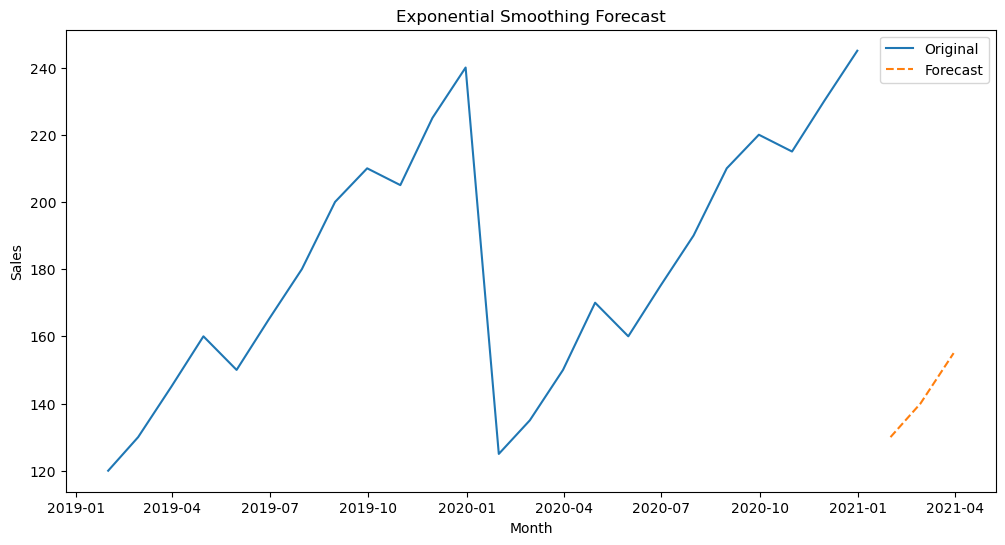

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Hypothetical monthly sales data for two years
data = [120, 130, 145, 160, 150, 165, 180, 200, 210, 205, 225, 240,
        125, 135, 150, 170, 160, 175, 190, 210, 220, 215, 230, 245]

# Convert data to pandas Series with a datetime index
index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')
series = pd.Series(data, index=index)

# Apply Exponential Smoothing with trend and seasonality
model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 3 periods
forecast = model.forecast(3)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Modify this code for the assignment
## This code provides you with the data pull, moving averages and train/test split

In [8]:
#!pip install yfinance

[*********************100%***********************]  1 of 1 completed

-------Raw Data-------
Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-03  179.076599  182.009995  182.880005  177.710007  177.830002   
2022-01-04  176.803802  179.699997  182.940002  179.119995  182.630005   
2022-01-05  172.100845  174.919998  180.169998  174.639999  179.610001   
2022-01-06  169.227905  172.000000  175.300003  171.639999  172.699997   
2022-01-07  169.395157  172.169998  174.139999  171.029999  172.889999   

Price          Volume  
Ticker           AAPL  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  
-------Engineered Data-------
Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   520.000000  52

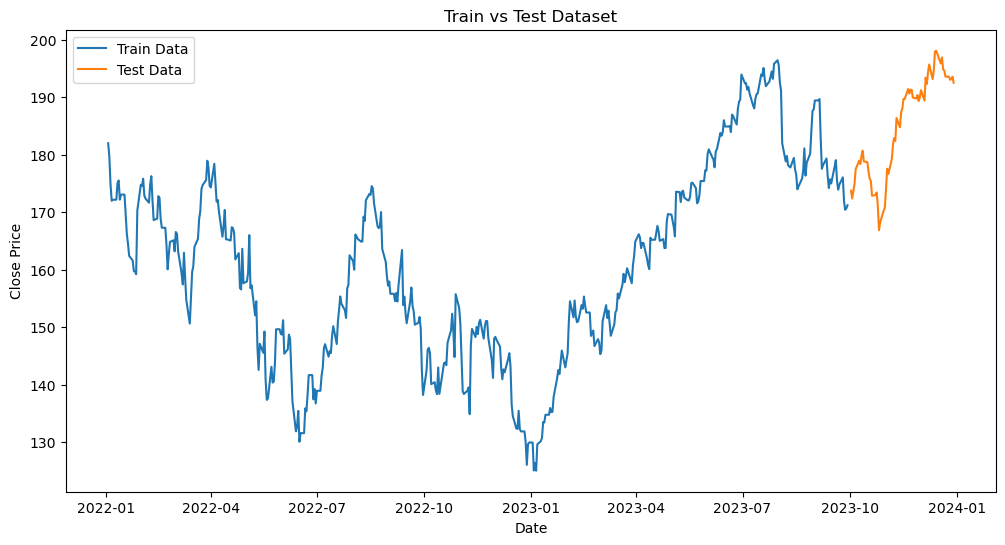

In [8]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Data Acquisition
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
stock_data.sort_index(ascending=True, inplace=True)

# Ensure proper DatetimeIndex with frequency for time series analysis
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')

print('-------Raw Data-------')
print(stock_data.head())

# Calculate rolling averages
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()

print('-------Engineered Data-------')
print(stock_data.describe())

# Split the data into training and test sets
split_date = pd.to_datetime('2023-10-01')
train = stock_data.loc[stock_data.index < split_date]
test = stock_data.loc[stock_data.index >= split_date]

# Prepare the training and test data for Linear Regression
X_train = train[['7_day_avg', '30_day_avg']]
y_train = train['Close']
X_test = test[['7_day_avg', '30_day_avg']]

# Visualization of Train and Test Datasets
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train Data')
plt.plot(test.index, test['Close'], label='Test Data')
plt.title('Train vs Test Dataset')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

<hr> 

## Start of student's work

Model Building (40 points)

Implement linear regression using the rolling averages as features. (20 points)
Create an Exponential Smoothing model that accounts for trend and seasonality. (20 points)
Performance Metrics (20 points)

Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model.
Provide commentary on the performance of each model based on these metrics.
Model Comparison and Interpretation (40 points)

Compare the forecasted values against the actual values in the test set visually using a plot. (10 points)
Interpret the results of each model and discuss any potential reasons for differences in performance. (15 points)
Discuss the implications of model performance for real-world decision-making in finance. (15 points)

[*********************100%***********************]  1 of 1 completed


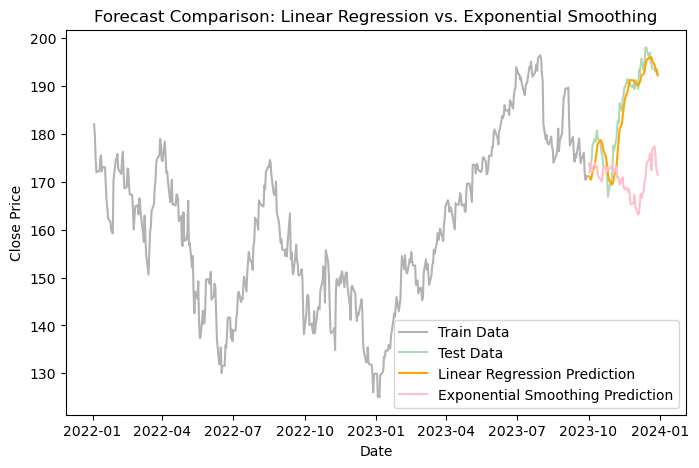

In [61]:
from sklearn.model_selection import train_test_split
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
import seaborn as sns

# Data Acquisition
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
stock_data.sort_index(ascending=True, inplace=True)

# Ensure proper DatetimeIndex with frequency for time series analysis
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')

# Calculate rolling averages
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()


# Split the data into training and test sets
split_date = pd.to_datetime('2023-10-01')
train = stock_data.loc[stock_data.index < split_date]
test = stock_data.loc[stock_data.index >= split_date]

# Prepare the training and test data for Linear Regression
X_train = train[['7_day_avg', '30_day_avg']]
y_train = train['Close']
X_test = test[['7_day_avg', '30_day_avg']]

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

# Fit the Exponential Smoothing model
es_model = ExponentialSmoothing(
    train['Close'], 
    seasonal='add', 
    trend='add', 
    seasonal_periods=150,  # ideally need 252 periods but not enough data 
).fit()

y_pred_es = es_model.forecast(len(test))

# Calculate evaluation metrics for Linear Regression
mae_lr = mean_absolute_error(test['Close'], y_pred_lr)
mse_lr = mean_squared_error(test['Close'], y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Calculate evaluation metrics for Exponential Smoothing
mae_es = mean_absolute_error(test['Close'], y_pred_es)
mse_es = mean_squared_error(test['Close'], y_pred_es)
rmse_es = np.sqrt(mse_es)

# Store results in a DataFrame
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Exponential Smoothing'],
    'MAE': [mae_lr, mae_es],
    'MSE': [mse_lr, mse_es],
    'RMSE': [rmse_lr, rmse_es]
})

# Visualization of forecast comparison
plt.figure(figsize=(8, 5))
plt.plot(train.index, train['Close'], label='Train Data', color='black', alpha=0.3)
plt.plot(test.index, test['Close'], label='Test Data', color='green', alpha=0.3)
plt.plot(test.index, y_pred_lr, label='Linear Regression Prediction', color='orange')
plt.plot(test.index, y_pred_es, label='Exponential Smoothing Prediction', color='pink')
plt.title('Forecast Comparison: Linear Regression vs. Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [62]:
results_df

,Model,MAE,MSE,RMSE
0,Linear Regression,2.474775,9.219866,3.036423
1,Exponential Smoothing,14.596193,304.167940,17.440411


**Note:** Exponential Smoothing model produces very poor results when compared to Linear Regression possibly due to a limited data that does not allow setting seasonality to 252 days, for example. Possible improvements may be achieved with detailed grid search. 

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from itertools import product

# Data Acquisition
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
stock_data.sort_index(ascending=True, inplace=True)
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')

# Split the data into training and test sets
split_date = pd.to_datetime('2023-10-01')
train = stock_data.loc[stock_data.index < split_date]['Close']
test = stock_data.loc[stock_data.index >= split_date]['Close']

# Define grid search parameters
trends = ['add', None]
seasonals = ['add', None]
seasonal_periods = [30, 60, 90, 120, 150]

# Prepare results storage
results = []

# Perform grid search
for trend, seasonal, period in product(trends, seasonals, seasonal_periods):
    try:
        # Skip invalid combinations
        if trend is None and seasonal is not None:
            continue

        # Fit Exponential Smoothing model
        model = ExponentialSmoothing(
            train,
            trend=trend,
            seasonal=seasonal,
            seasonal_periods=period if seasonal is not None else None
        )
        fitted_model = model.fit()

        # Forecast and calculate metrics
        forecast = fitted_model.forecast(len(test))
        mse_score = mean_squared_error(test, forecast)
        mae_score = mean_absolute_error(test, forecast)
        rmse_score = np.sqrt(mse_score)

        # Store the results
        results.append({
            'Trend': trend,
            'Seasonal': seasonal,
            'Seasonal Periods': period,
            'MSE': mse_score,
            'MAE': mae_score,
            'RMSE': rmse_score
        })
    except Exception as e:
        print(f"Error with parameters: Trend={trend}, Seasonal={seasonal}, Period={period}")
        print(e)

# Convert results to a DataFrame
if not results:
    raise ValueError("No valid models were fitted during the grid search.")
results_df_grid = pd.DataFrame(results)

# Find the best model based on RMSE
best_result = results_df_grid.loc[results_df_grid['RMSE'].idxmin()]

# Extract parameters and metrics of the best model
best_params = {
    'Trend': best_result['Trend'],
    'Seasonal': best_result['Seasonal'],
    'Seasonal Periods': best_result['Seasonal Periods']
}
best_model_metrics = {
    'Model': 'Best Exponential Smoothing',
    'MSE': best_result['MSE'],
    'MAE': best_result['MAE'],
    'RMSE': best_result['RMSE']
}

# Print the best model parameters
print("\nBest Model Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Assuming results_df already exists
new_metrics_df = pd.DataFrame([best_model_metrics])
results_df = pd.concat([results_df, new_metrics_df], ignore_index=True)

# Sort by RMSE
results_df = results_df.sort_values('RMSE').reset_index(drop=True)

# Fit and forecast using the best model
best_model = ExponentialSmoothing(
    train,
    trend=best_params['Trend'],
    seasonal=best_params['Seasonal'],
    seasonal_periods=best_params['Seasonal Periods'] if best_params['Seasonal'] is not None else None
)
best_fitted_model = best_model.fit()
best_forecast = best_fitted_model.forecast(len(test))


# # Display Best Parameters
# print("\nBest Model Parameters:")
# for param, value in best_params.items():
#     print(f"{param}: {value}")


[*********************100%***********************]  1 of 1 completed
/home/dima/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/dima/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



Best Model Parameters:
Trend: add
Seasonal: add
Seasonal Periods: 90


/home/dima/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [64]:
results_df

,Model,MAE,MSE,RMSE
0,Linear Regression,2.474775,9.219866,3.036423
1,Best Exponential Smoothing,10.726141,152.849627,12.363237
2,Exponential Smoothing,14.596193,304.167940,17.440411


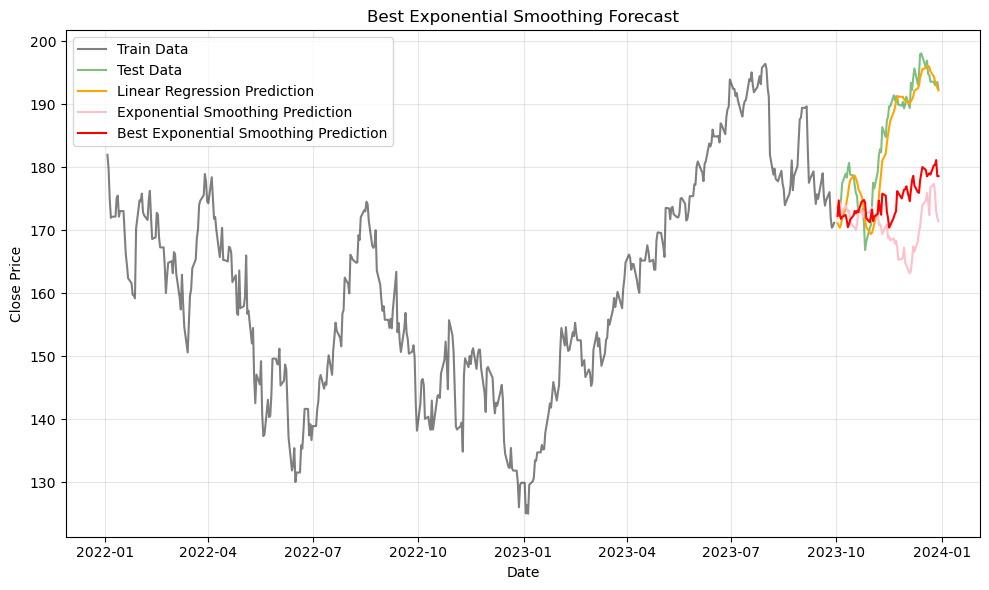

In [65]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train Data', color='black', alpha=0.5)
plt.plot(test.index, test, label='Test Data', color='green', alpha=0.5)
plt.plot(test.index, y_pred_lr, label='Linear Regression Prediction', color='orange')
plt.plot(test.index, y_pred_es, label='Exponential Smoothing Prediction', color='pink')
plt.plot(test.index, best_forecast, label='Best Exponential Smoothing Prediction', color='red')
plt.title('Best Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Note:** there is some improvement in performance with optimized parameters of Exponensial Smoothing, at least now it seems to capture the overall upward trend. Below are the best params:
- `Trend: add`
- `Seasonal: add`
- `Seasonal Periods: 90`


## Extra Credit Assignment (50 points total)

### Objective
Build an LSTM model to predict the closing prices of Apple Inc. (AAPL) stock and compare it to the models in the core assignment.

### Deliverables and Points Breakdown

1. **LSTM Model Implementation (30 points)**
   - Develop an LSTM model on the given dataset.
   - Ensure proper configuration and parameter tuning.

2. **Model Prediction and Visualization (10 points)**
   - Use the model to predict the test dataset.
   - Visualize the prediction results.

3. **Model Evaluation and Comparative Analysis (10 points)**
   - Evaluate the model using appropriate metrics.
   - Compare with the models from the core assignment and discuss the findings.

In [66]:
#!pip install tensorflow

<hr>

## Start of student's work

In [67]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train.values.reshape(-1, 1))
scaled_test = scaler.transform(test.values.reshape(-1, 1))

# Create sequences
seq_length = 30
X_train, y_train = create_sequences(scaled_train, seq_length)
X_test, y_test = create_sequences(scaled_test, seq_length)

# Reshape input to [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(seq_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])

# Predict
lstm_predictions = model.predict(X_test)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
lstm_mse = mean_squared_error(y_test_original, lstm_predictions)
lstm_mae = mean_absolute_error(y_test_original, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)

# Store results in the results_df
lstm_results = pd.DataFrame([{
    'Model': 'LSTM',
    'MSE': lstm_mse,
    'MAE': lstm_mae,
    'RMSE': lstm_rmse
}])

# Assuming results_df already exists
results_df = pd.concat([results_df, lstm_results], ignore_index=True)

# Sort the results by RMSE
results_df = results_df.sort_values('RMSE').reset_index(drop=True)

/home/dima/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f81a9ff8900> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


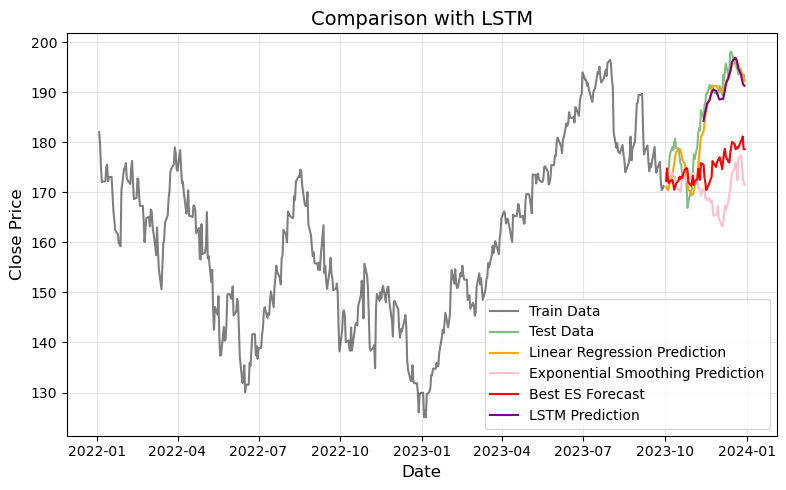

In [68]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(train.index, train, label='Train Data', color='black', alpha=0.5)
plt.plot(test.index, test, label='Test Data', color='green', alpha=0.5)
plt.plot(test.index, y_pred_lr, label='Linear Regression Prediction', color='orange')
plt.plot(test.index, y_pred_es, label='Exponential Smoothing Prediction', color='pink')
plt.plot(test.index, best_forecast, label='Best ES Forecast', color='red')
plt.plot(test.index[seq_length:], lstm_predictions, label='LSTM Prediction', color='purple')

plt.title('Comparison with LSTM', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


**Note:** LSTM performs much better in terms of errors and, what is probably more important, outputs the entire sequnce of 32 days. It seems that is also catching both the upward trend and seasonal effects.

In [69]:
results_df

,Model,MAE,MSE,RMSE
0,LSTM,1.646337,4.237915,2.058620
1,Linear Regression,2.474775,9.219866,3.036423
2,Best Exponential Smoothing,10.726141,152.849627,12.363237
3,Exponential Smoothing,14.596193,304.167940,17.440411
